# DataCamp Certification Case Study

### Project Brief

You have been hired as a data scientist at a used car dealership in the UK. The sales team have been having problems with pricing used cars that arrive at the dealership and would like your help. Before they take any company wide action they would like you to work with the Toyota specialist to test your idea. They have already collected some data from other retailers on the price that a range of Toyota cars were listed at. It is known that cars that are more than £1500 above the estimated price will not sell. The sales team wants to know whether you can make predictions within this range.

The presentation of your findings should be targeted at the Head of Sales, who has no technical data science background.

The data you will use for this analysis can be accessed here: `"data/toyota.csv"`

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
toyota_df = pd.read_csv('data/toyota.csv')
toyota_df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


## Understanding the dataset 

<p>In this section we will try to analyze what data is given to us and find if there are any missing values that needs to replaced.</p>

In [18]:
toyota_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


In [19]:
toyota_df.describe()

,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


In [20]:
toyota_df.nunique()

model             18
year              23
price           2114
transmission       4
mileage         5699
fuelType           4
tax               29
mpg               81
engineSize        16
dtype: int64

In [21]:
#Checkig if any of the values in the dataset is null
toyota_df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

<p>From the data analysis we do see that there are <b>no null</b> values. Data consists of 18 distinct car models with 6738 individual cars and ranges from 1998 car till 2020.<p>Since the problem statement is to find the an algorithm for the sales inorder to give a pricing model. <b>Price </b> is our target variable. The price ranges from $850 - $59,995.</p>

## Data Visualization

<p>In this section we will try and find different parameters that are correlated with the price of the car.</p>

In [22]:
num_cars = toyota_df.groupby('model').size().reset_index(name='counts')
num_cars.sort_values(by='counts',ascending=False)

,model,counts
17,Yaris,2122
2,Aygo,1961
0,Auris,712
3,C-HR,479
12,RAV4,473
5,Corolla,267
11,Prius,232
1,Avensis,115
15,Verso,114
7,Hilux,86


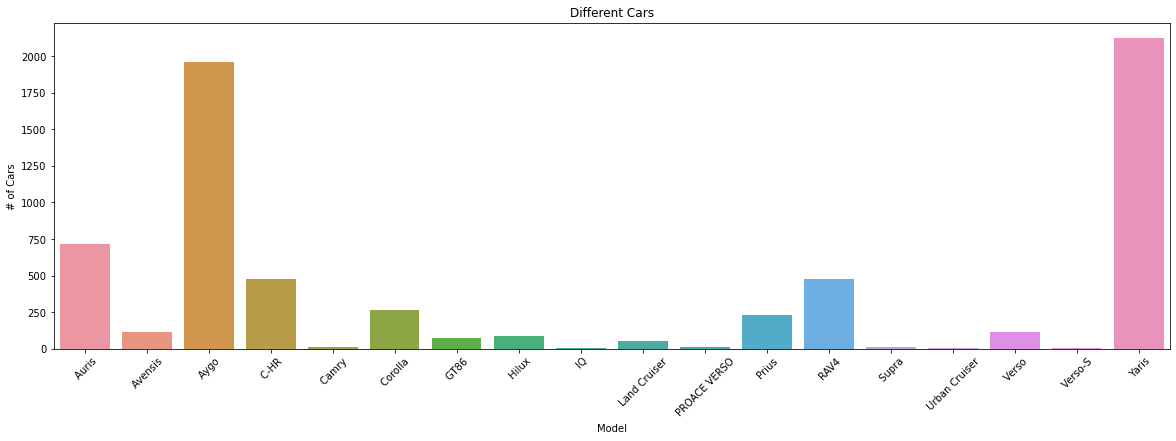

In [23]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.barplot(x='model',y='counts',data=num_cars)
plt.xticks(rotation=45)
plt.xlabel('Model')
plt.ylabel('# of Cars')
plt.title('Different Cars')
plt.show()

### Price comparison to other features

<p> Price is compared with Fuel Type, Year, Mileage on the car </p>

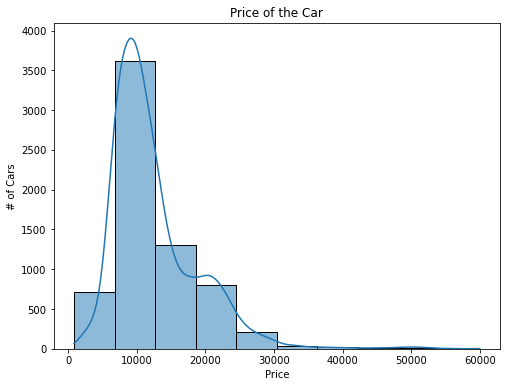

In [24]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(x='price',data=toyota_df,bins=10,kde=True)
plt.xlabel('Price')
plt.ylabel('# of Cars')
plt.title('Price of the Car')
plt.show()

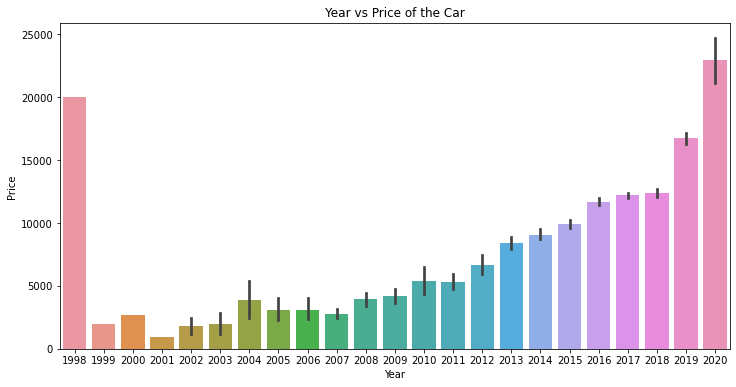

In [25]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='year',y='price',data=toyota_df)
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Year vs Price of the Car')
plt.show()

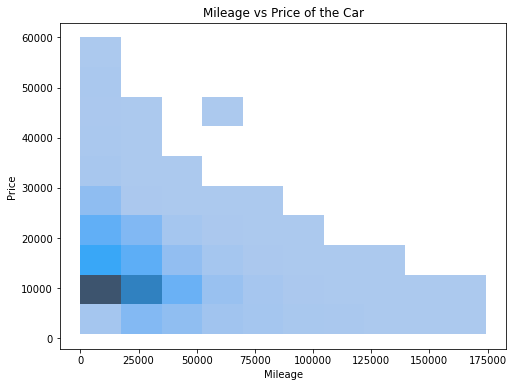

In [26]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(x='mileage',y='price',data=toyota_df,bins=10)
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage vs Price of the Car')
plt.show()

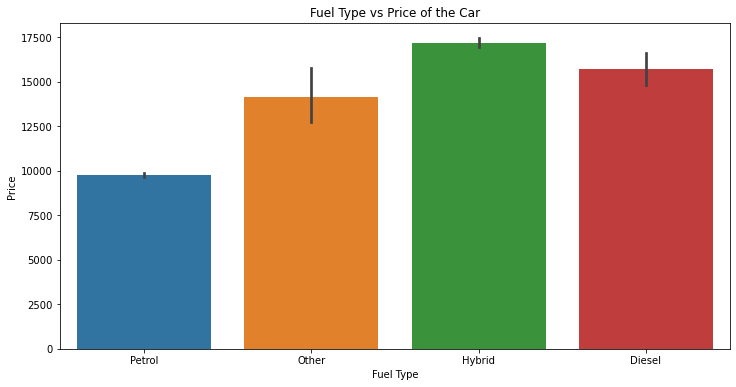

In [27]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='fuelType',y='price',data=toyota_df)
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.title('Fuel Type vs Price of the Car')
plt.show()

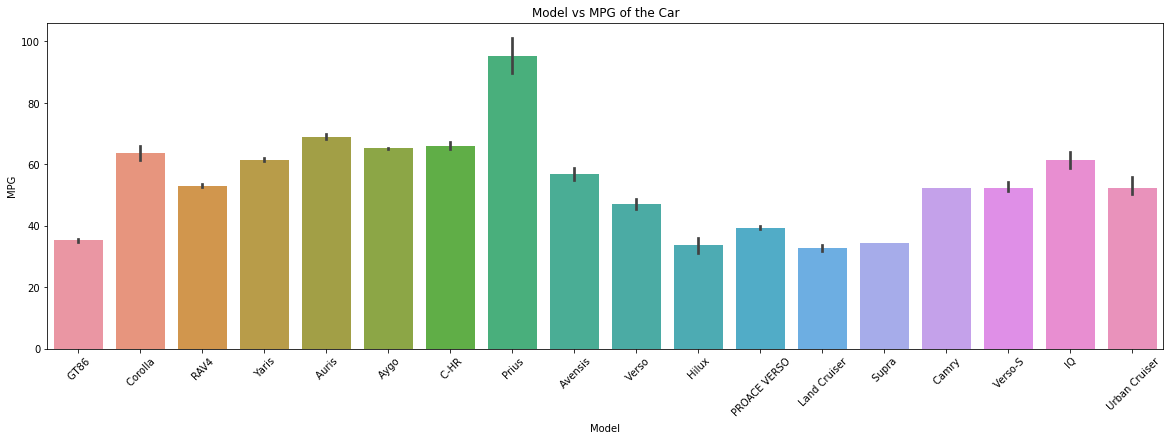

In [28]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.barplot(x='model',y='mpg',data=toyota_df)
plt.xticks(rotation=45)
plt.xlabel('Model')
plt.ylabel('MPG')
plt.title('Model vs MPG of the Car')
plt.show()

### Finding the most expensive cars

<p> From the histogram we did see that the data consists of very few expensive cars and would like to analyze as to which model and years do they belong to inorder to better get an understanding for the pricing </p>

In [29]:
num_car_30k = toyota_df[toyota_df['price'] > 30000].value_counts().reset_index()
num_car_30k

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,0
0,C-HR,2019,30990,Automatic,2500,Hybrid,140,54.3,2.0,1
1,RAV4,2019,33950,Automatic,9125,Hybrid,140,49.6,2.5,1
2,RAV4,2019,33880,Automatic,7576,Hybrid,140,49.6,2.5,1
3,RAV4,2019,33626,Automatic,7191,Hybrid,135,49.6,2.5,1
4,RAV4,2019,33595,Automatic,8000,Hybrid,140,49.6,2.5,1
...,...,...,...,...,...,...,...,...,...,...
85,Land Cruiser,2019,42990,Semi-Auto,22845,Diesel,150,30.1,2.8,1
86,Land Cruiser,2019,42444,Semi-Auto,10083,Diesel,145,30.1,2.8,1
87,Land Cruiser,2019,40999,Semi-Auto,11619,Diesel,145,30.1,2.8,1
88,Land Cruiser,2019,40995,Semi-Auto,11404,Diesel,145,30.1,2.8,1


In [14]:
model_30k = num_car_30k.groupby('model').size().reset_index(name='counts')
model_30k

,model,counts
0,C-HR,1
1,GT86,1
2,Hilux,6
3,Land Cruiser,38
4,PROACE VERSO,2
5,Prius,1
6,RAV4,29
7,Supra,12


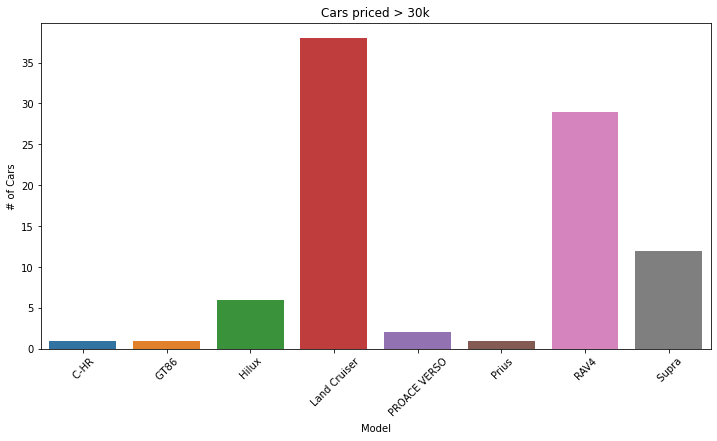

In [15]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='model',y='counts',data=model_30k)
plt.xticks(rotation=45)
plt.xlabel('Model')
plt.ylabel('# of Cars')
plt.title('Cars priced > 30k')
plt.show()

In [16]:
model_year_30k = num_car_30k.groupby(['model','year']).size().reset_index(name='counts')
model_year_30k

,model,year,counts
0,C-HR,2019,1
1,GT86,2020,1
2,Hilux,2019,3
3,Hilux,2020,3
4,Land Cruiser,2014,2
5,Land Cruiser,2015,3
6,Land Cruiser,2016,2
7,Land Cruiser,2017,7
8,Land Cruiser,2018,1
9,Land Cruiser,2019,15


In [17]:
min_max_value = toyota_df.groupby('model')['price'].agg(['min','max','mean']).reset_index()
min_max_value

,model,min,max,mean
0,Auris,1599,19300,12507.911517
1,Avensis,850,16495,9884.356522
2,Aygo,1295,15000,7905.414584
3,C-HR,11995,30990,20651.540710
4,Camry,24990,29990,26910.090909
5,Corolla,899,29450,20942.734082
6,GT86,9995,31000,19908.849315
7,Hilux,7750,39257,21504.593023
8,IQ,2495,5995,4247.250000
9,Land Cruiser,5975,54991,36487.156863


<p> Interesting facts are derived from our above analysis 
<ol>
<li>A total of 90 cars that are price greater than 30k and comprises of 8 different models. </li>
<li>Majority of the cars belong to models - <b>Land Cruiser</b> and <b>RAV4</b>. </li>
<li>The most expensive car is <b>Supra</b> which is priced at 59.95k and the cheapest car being <b>Avensis</b> priced at 850.</li>
</ol>
</p>
<p> Lets try and visualize different correlations</p>

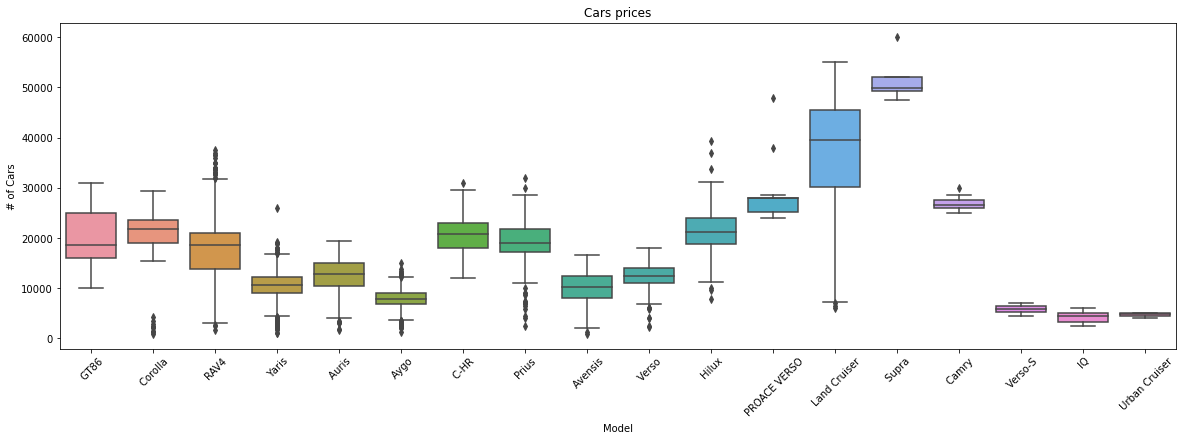

In [18]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.boxplot(x='model',y='price',data=toyota_df)
plt.xticks(rotation=45)
plt.xlabel('Model')
plt.ylabel('# of Cars')
plt.title('Cars prices')
plt.show()

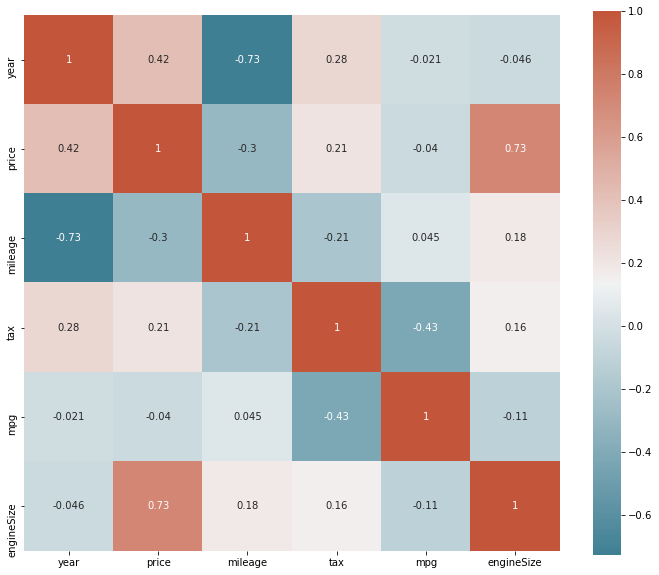

In [19]:
corr_df = toyota_df.corr()
fig=plt.gcf()
fig.set_size_inches(12,10)
sns.heatmap(data=corr_df, square=True, annot=True, cbar=True,cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.show()

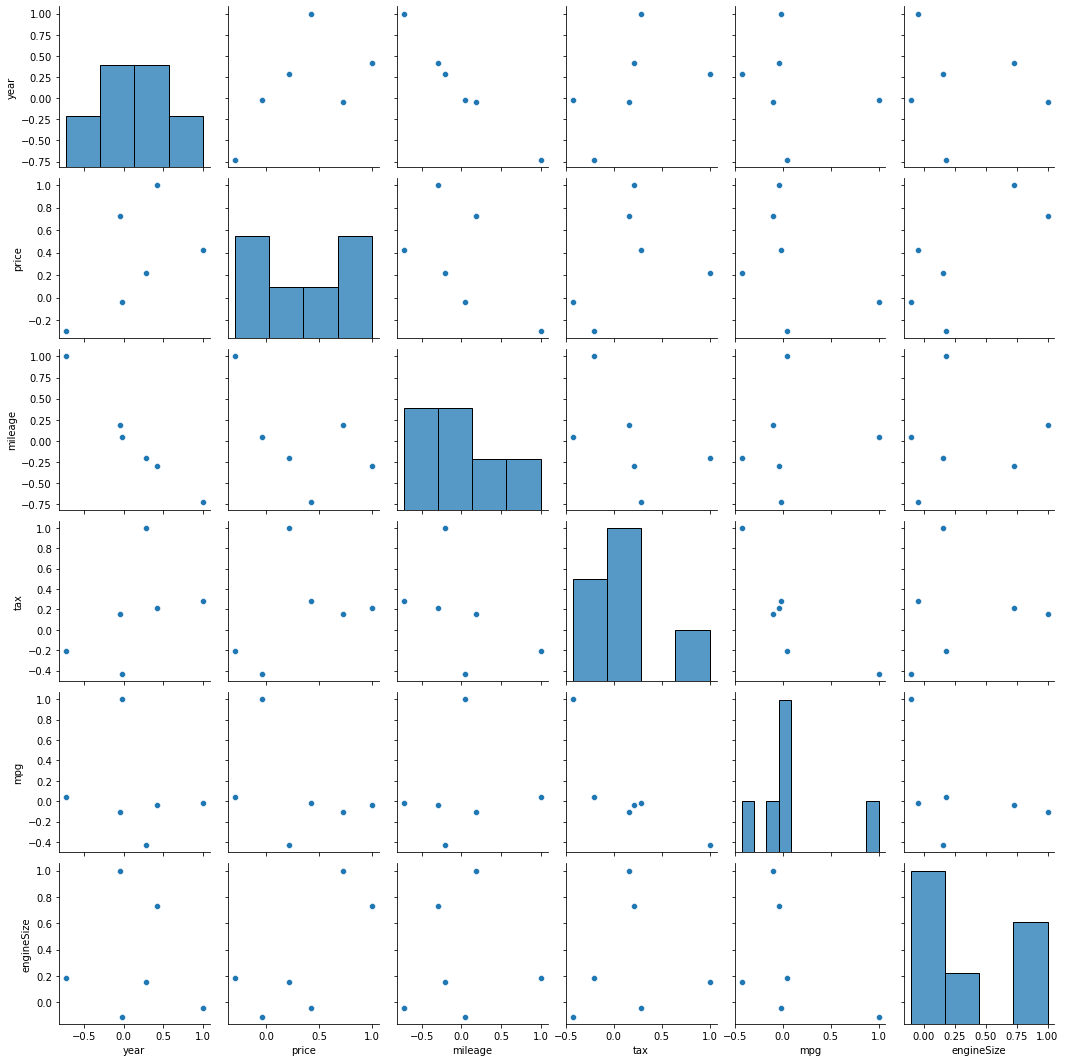

In [20]:
fig.set_size_inches(10,10)
sns.pairplot(corr_df)
plt.show()

<p>From the correlation we can see that there is positive correlation with EngineSize and Price. However, from the scatter plot we see that there is no linear correlation between any values.</p>

## Data Cleaning & Train Test Split

<p> In this section, we will be achieving the following things 
<ol>
<li>Converting the object columns into numerical columns inorder to feed it to different Regression Algorithms.</li>
<li>Since the numerical values are widely ranged we will convert them using MinMax Scaler. </li>
</ol>
</p>

In [21]:
toyota_df.select_dtypes('object').columns

Index(['model', 'transmission', 'fuelType'], dtype='object')

In [22]:
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE


In [23]:
toyota_df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [24]:
X = toyota_df.iloc[:, [0,1,3,4,5,6,7,8]]
y = toyota_df.iloc[:,2]
print("Shape of X - {}".format(X.shape))
print("Shape of y - {}".format(y.shape))

Shape of X - (6738, 8)
Shape of y - (6738,)


In [25]:
# Splitting the data into Train Test 
X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [26]:
categorical_var = ['model', 'transmission', 'fuelType']

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[categorical_var]))
OH_cols_test = pd.DataFrame(OH_encoder.transform(X_test[categorical_var]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_test.index = X_test.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(categorical_var, axis=1)
num_X_test = X_test.drop(categorical_var, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_test = pd.concat([num_X_test, OH_cols_test], axis=1)

In [27]:
print("Shape of training Data - {}".format(OH_X_train.shape))
print("Shape of test Data - {}".format(OH_X_test.shape))

Shape of training Data - (5390, 31)
Shape of test Data - (1348, 31)


In [28]:
minmax = MinMaxScaler(feature_range=[0,1])
scaled_X_train = minmax.fit_transform(OH_X_train)
scaled_X_test = minmax.transform(OH_X_test)

In [29]:
print("Shape of final X_train - {}".format(scaled_X_train.shape))

Shape of final X_train - (5390, 31)


## Defining BaseLine model 

<p> We will start with the basic Linear Regression model. Inorder to form a baseline that will be used to compare our future evaluations </p>

In [30]:
lreg = LinearRegression(n_jobs=-1)
lreg.fit(scaled_X_train,y_train)

# Use logreg to predict instances from the test set and store it
y_pred = lreg.predict(scaled_X_test)

rsme = MSE(y_test,y_pred) ** (1/2)
print("RSME of the base model - {}".format(rsme))


RSME of the base model - 1768.2842587662751


## Trying different Regression models

<p>In this approach we are trying to find the model that best fits the data and reduces the RSME score. </p>

In [31]:
def get_models():
    model = dict()
    model['LR'] = LinearRegression()
    model['CART'] = DecisionTreeRegressor()
    model['RF'] = RandomForestRegressor()
    model['GBM'] = GradientBoostingRegressor()
    return model

In [32]:
def evaluate_model(X,y,model):    
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)    
    score = (np.mean(scores)*-1)**(1/2)
    return score

In [33]:
models = get_models()
results = dict()
for key,value in models.items():
    results[key] = evaluate_model(scaled_X_train,y_train,value)    
    print('>%s %.3f' % (key, results[key]))

>LR 1717.371
>CART 1600.077
>RF 1263.287
>GBM 1293.640


### Using the best fit Model and Tuning it using HyperParameters
From the above analysis we see that RandomForest Regressor gave us the lowest RSME amongst all the ones compared on our training dataset. We will try to do hyperparameter tuning inorder to achieve the best possible results and values that fit our dataset. 

In [34]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 500, stop = 2000, num = 4)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 10, num = 3)]
max_depth.append(None)

In [35]:
# Create the params grid
param_grid = {'n_estimators': n_estimators,               
               'max_depth': max_depth
             }

In [36]:
gm_cv = GridSearchCV(estimator=RandomForestRegressor(),param_grid= param_grid,cv = 5,n_jobs=-1)
gm_cv.fit(scaled_X_train,y_train)
print(gm_cv.best_params_)

{'max_depth': 10, 'n_estimators': 500}


In [41]:
y_gm_cv_preds = gm_cv.predict(scaled_X_test)
r2 = gm_cv.score(scaled_X_test,y_test)
rsme_hyp_gm_cv = MSE(y_test,y_gm_cv_preds)**(1/2)
print("Tuned RandomForest Regressor RMSE: {}".format(rsme_hyp_gm_cv))
print("Tuned RandomForest Regressor R2: {}".format(r2))

Tuned RandomForest Regressor RMSE: 1169.4266868717675
Tuned RandomForest Regressor R2: 0.9678646919777895


In [ ]:
# Plot of Precited vs Actual for the first 150 observation of Linear Regression model
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(len(y_gm_cv_preds[-150:]))), y=y_gm_cv_preds[-150:],
                         mode='lines',
                         name='Prediction'))
fig.add_trace(go.Scatter(x=list(range(len(y_test[-150:]))), y=y_test[-150:],
                         mode='lines',
                         name='True value'))

fig.show()

## Summary
<p>We have reduced the RSME dramatically by using hyperparameters and thereby have an improved R2 score.</p> This model will help the Sales team to keep better pricing for the cars of various years , models and fuel type. 